## Respuesta dinámica a excitaciones generales sin amortiguación
### Cálculo directo de la integral de Duhamel
#### Fuerza exponencial

#### Problema 7. 
Un depósito de agua modelado en la figura está sometido en sus cimientos a una aceleración cutya función se muestra en la figura. Determinar el desplazamiento máximo de la parte superior de la torre. Despreciar la amortiguación del sistema.


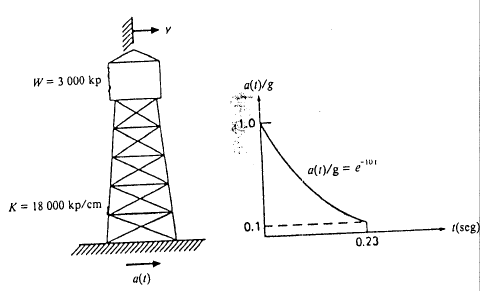

In [1]:
from IPython.display import Image
Image(filename="imagenes/fig_3.png")

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from librerias.integral import cuad_gauss # librería que aproxima las integrales mediante el método de Cuadratura de Gauss

In [3]:
# Iniciamos las variables
P = 3000 # Peso W en kp
g = 980 # Gravedad en cm/s2
m = P/g  # masa en kp*s2/cm
k = 18000  # rigidez en kp/cm

w = (k/m)**0.5  # Frecuencia angular natural(rad/s)

F = F = lambda t: m * g * np.exp(-10 * t)	# Fuerza con aceleración constante aplicada al cimiento
tf = 0.23 # tienpo hasta que se aplica la fuerza
dt = 0.01 # intervalos de tiempo

Cálculos:

Utilizaremos las siguientes ecuaciones:
$$ A(t_i)=A(t_{i-1}) + \int^{t_i}_{t_{i-1}} F(\tau) cos(\omega \tau) d\tau$$
$$ B(t_i)=B(t_{i-1}) + \int^{t_i}_{t_{i-1}} F(\tau) sen(\omega \tau) d\tau$$


$$ y(t_i) = \frac{1}{m \omega}(A(t_i)sen(\omega t_i)-B(t_i)cos(\omega t_i) )$$

In [4]:
# Variables iniciales necesarias
y0 = 0 # desplazamiento inicial
v0 = 0 # velocidad inicial
a0 = 0 # acelereación inicial
A = 0
B = 0
AA = [A]
BB = [B]
y = [y0]
v = [v0]
a = [a0]
n = int(tf / dt) 
tt = np.arange(0, tf + dt, dt) # vector con los intervalos de tiempo

In [5]:
# definimos las ecuaciones dentro de las integrales
eqA = lambda t: F(t) * np.cos(w * t)
eqB = lambda t: F(t) * np.sin(w * t)

In [6]:
# definimos las función y(t) = f y derivadas
f = lambda t: (A * np.sin(w * t) - B * np.cos(w * t)) / (m * w)
h = 0.000001
df = lambda t: (f(t + h) - f(t))/h # primera derivada
# ddf = lambda t: (df(t + h) - df(t))/h # segunda derivada
df2 = lambda t: (f(t + h) -2*f(t)+ f(t-h))/(h**2) # segunda derivada

In [7]:
# iteramos
for i in range(n):
    A = A + cuad_gauss(tt[i], tt[i + 1], eqA)
    B = B + cuad_gauss(tt[i], tt[i + 1], eqB)
    
    AA.append(A)
    BB.append(B)
    y.append(f(tt[i + 1]))
    v.append(df(tt[i + 1]))
    a.append(df2(tt[i + 1]))

In [8]:
DF = pd.DataFrame({'t(s)':tt,'A':AA,'B':BB,'Desplazamiento':y,'Velocidad':v,'Aceleración':a})
DF


,t(s),A,B,Desplazamiento,Velocidad,Aceleración
0,0.00,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.01,25.89913,10.25306,0.045099,8.416324,-265.181155
2,0.02,36.33791,33.19378,0.149440,11.276529,-878.704415
3,0.03,28.73727,54.69552,0.246578,7.060051,-1449.877718
4,0.04,10.28560,63.93421,0.274866,-1.800183,-1616.212830
5,0.05,-7.53765,58.36988,0.211888,-10.278840,-1245.898940
6,0.06,-15.65786,43.55448,0.086938,-13.570442,-511.196335
7,0.07,-11.64764,28.80281,-0.035431,-9.778613,208.336640
8,0.08,0.22672,21.70833,-0.091602,-0.977042,538.616943
9,0.09,12.41804,24.54049,-0.054544,7.951757,320.716398


In [9]:
print("Desplazamiento máximo: {}\nVelocidad máxima: {}\nAceleración máxima: {}".format(round((DF['Desplazamiento'].abs()).max(),3),round((DF['Velocidad'].abs()).max(),3),round((DF['Aceleración'].abs()).max(),3)))

Desplazamiento máximo: 0.275
Velocidad máxima: 13.57
Aceleración máxima: 1616.213
